In [2]:

import numpy as np
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data
from sklearn.linear_model import LinearRegression
# Neural networks.
import tensorflow.keras as kr

# Plot style.
plt.style.use("ggplot")

# Plot size.
plt.rcParams['figure.figsize'] = [14, 8]

In [3]:
data = pd.read_csv('powerproduction.csv')  # load data set
X = data.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
Y = data.iloc[:, 1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
model = LinearRegression()  # create object for the class
model.fit(X, Y)  # perform linear regression
Y_pred = model.predict(X)  # make predictions

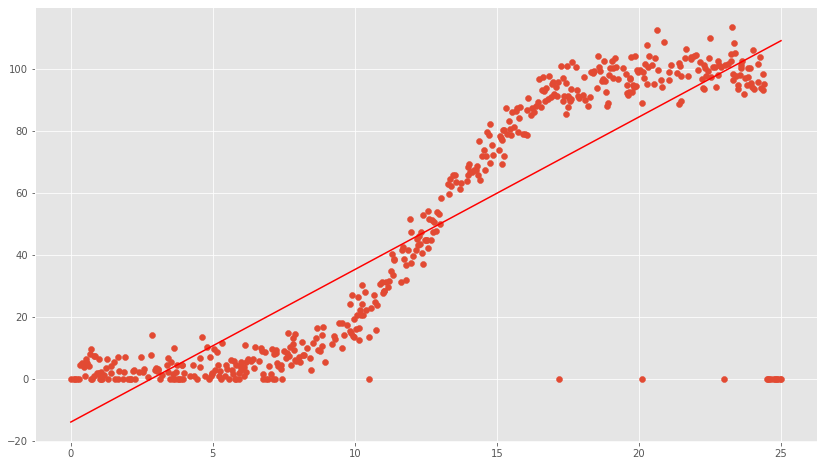

In [4]:
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

In [5]:
df = pd.read_csv("powerproduction.csv")

# take a look at the dataset
df.head()

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0


In [6]:
cdf = df[['speed','power']]
cdf.head(9)

,speed,power
0,0.000,0.000
1,0.125,0.000
2,0.150,0.000
3,0.225,0.000
4,0.275,0.000
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048


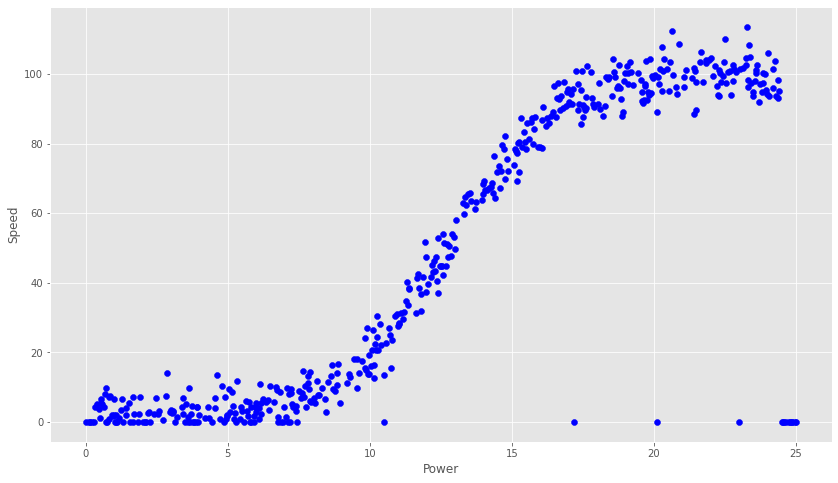

In [7]:
plt.scatter(cdf.speed, cdf.power,  color='blue')
plt.xlabel("Power")
plt.ylabel("Speed")
plt.show()

In [8]:
msk = np.random.rand(len(df)) < 0.3
train = cdf[msk]
test = cdf[~msk]

In [9]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x = np.asanyarray(train[['speed']])
train_y = np.asanyarray(train[['power']])

test_x = np.asanyarray(test[['speed']])
test_y = np.asanyarray(test[['power']])


poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[1.00000000e+00, 1.50000000e-01, 2.25000000e-02],
       [1.00000000e+00, 5.01000000e-01, 2.51001000e-01],
       [1.00000000e+00, 5.26000000e-01, 2.76676000e-01],
       [1.00000000e+00, 5.51000000e-01, 3.03601000e-01],
       [1.00000000e+00, 9.51000000e-01, 9.04401000e-01],
       [1.00000000e+00, 1.02600000e+00, 1.05267600e+00],
       [1.00000000e+00, 1.25100000e+00, 1.56500100e+00],
       [1.00000000e+00, 1.50200000e+00, 2.25600400e+00],
       [1.00000000e+00, 1.55200000e+00, 2.40870400e+00],
       [1.00000000e+00, 1.82700000e+00, 3.33792900e+00],
       [1.00000000e+00, 2.55300000e+00, 6.51780900e+00],
       [1.00000000e+00, 2.82800000e+00, 7.99758400e+00],
       [1.00000000e+00, 3.00300000e+00, 9.01800900e+00],
       [1.00000000e+00, 3.02800000e+00, 9.16878400e+00],
       [1.00000000e+00, 3.07800000e+00, 9.47408400e+00],
       [1.00000000e+00, 3.52900000e+00, 1.24538410e+01],
       [1.00000000e+00, 3.67900000e+00, 1.35350410e+01],
       [1.00000000e+00, 3.70400

In [25]:
# Train a different model.
model = kr.models.Sequential()
model.add(kr.layers.Dense(50, input_shape=(1,), activation='sigmoid', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model.add(kr.layers.Dense(1, activation='linear', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model.compile(kr.optimizers.Adam(lr=0.001), loss='mean_squared_error')

In [26]:
# Train the neural network on our training data.
model.fit(train_x, train_y, epochs=500,  batch_size=10)

Epoch 1/500
16/16 [==============================] - 0s 1ms/step - loss: 4116.4666
Epoch 2/500
16/16 [==============================] - 0s 1ms/step - loss: 4628.4966
Epoch 3/500
16/16 [==============================] - 0s 933us/step - loss: 4164.3167
Epoch 4/500
16/16 [==============================] - 0s 1ms/step - loss: 4007.6096
Epoch 5/500
16/16 [==============================] - 0s 1ms/step - loss: 3906.7787
Epoch 6/500
16/16 [==============================] - 0s 1ms/step - loss: 3768.5078
Epoch 7/500
16/16 [==============================] - 0s 1ms/step - loss: 4080.4322
Epoch 8/500
16/16 [==============================] - 0s 1ms/step - loss: 3763.7684
Epoch 9/500
16/16 [==============================] - 0s 1ms/step - loss: 3565.2975
Epoch 10/500
16/16 [==============================] - 0s 1ms/step - loss: 3772.6836
Epoch 11/500
16/16 [==============================] - 0s 1ms/step - loss: 3157.8912
Epoch 12/500
16/16 [==============================] - 0s 1ms/step - loss: 3388.2930

16/16 [==============================] - 0s 1000us/step - loss: 1205.0558
Epoch 98/500
16/16 [==============================] - 0s 1ms/step - loss: 1260.7532
Epoch 99/500
16/16 [==============================] - 0s 1ms/step - loss: 1130.0965
Epoch 100/500
16/16 [==============================] - 0s 1ms/step - loss: 1024.3083
Epoch 101/500
16/16 [==============================] - 0s 1000us/step - loss: 1021.0514
Epoch 102/500
16/16 [==============================] - 0s 933us/step - loss: 1032.1318
Epoch 103/500
16/16 [==============================] - 0s 933us/step - loss: 1133.0726
Epoch 104/500
16/16 [==============================] - 0s 1ms/step - loss: 1102.5175
Epoch 105/500
16/16 [==============================] - 0s 1000us/step - loss: 1001.9731
Epoch 106/500
16/16 [==============================] - 0s 1ms/step - loss: 932.9349
Epoch 107/500
16/16 [==============================] - 0s 1000us/step - loss: 1007.2016
Epoch 108/500
16/16 [==============================] - 0s 1000us/s

Epoch 193/500
16/16 [==============================] - 0s 1ms/step - loss: 574.0353
Epoch 194/500
16/16 [==============================] - 0s 1ms/step - loss: 423.8073
Epoch 195/500
16/16 [==============================] - 0s 1ms/step - loss: 373.3925
Epoch 196/500
16/16 [==============================] - 0s 1ms/step - loss: 476.2566
Epoch 197/500
16/16 [==============================] - 0s 1ms/step - loss: 589.3961
Epoch 198/500
16/16 [==============================] - 0s 1ms/step - loss: 428.3901
Epoch 199/500
16/16 [==============================] - 0s 1ms/step - loss: 507.2968
Epoch 200/500
16/16 [==============================] - 0s 1ms/step - loss: 404.0798
Epoch 201/500
16/16 [==============================] - 0s 1ms/step - loss: 416.6630
Epoch 202/500
16/16 [==============================] - 0s 1ms/step - loss: 484.0073
Epoch 203/500
16/16 [==============================] - 0s 1ms/step - loss: 343.5730
Epoch 204/500
16/16 [==============================] - 0s 1000us/step - loss

16/16 [==============================] - 0s 1ms/step - loss: 468.4102
Epoch 290/500
16/16 [==============================] - 0s 800us/step - loss: 242.4220
Epoch 291/500
16/16 [==============================] - 0s 1ms/step - loss: 470.4193
Epoch 292/500
16/16 [==============================] - 0s 1ms/step - loss: 325.2368
Epoch 293/500
16/16 [==============================] - 0s 1000us/step - loss: 390.6098
Epoch 294/500
16/16 [==============================] - ETA: 0s - loss: 161.009 - 0s 1ms/step - loss: 232.7320
Epoch 295/500
16/16 [==============================] - 0s 1ms/step - loss: 366.6447
Epoch 296/500
16/16 [==============================] - 0s 1ms/step - loss: 214.4943
Epoch 297/500
16/16 [==============================] - 0s 1ms/step - loss: 305.0123
Epoch 298/500
16/16 [==============================] - 0s 1ms/step - loss: 293.5517
Epoch 299/500
16/16 [==============================] - 0s 1000us/step - loss: 351.2047
Epoch 300/500
16/16 [==============================] - 0

16/16 [==============================] - 0s 1000us/step - loss: 426.8425
Epoch 386/500
16/16 [==============================] - 0s 1ms/step - loss: 263.7366
Epoch 387/500
16/16 [==============================] - 0s 1ms/step - loss: 399.0773
Epoch 388/500
16/16 [==============================] - 0s 1ms/step - loss: 263.4909
Epoch 389/500
16/16 [==============================] - 0s 1000us/step - loss: 274.7676
Epoch 390/500
16/16 [==============================] - 0s 1ms/step - loss: 302.2096
Epoch 391/500
16/16 [==============================] - 0s 1ms/step - loss: 306.6608
Epoch 392/500
16/16 [==============================] - 0s 1000us/step - loss: 367.8132
Epoch 393/500
16/16 [==============================] - 0s 1ms/step - loss: 257.4600
Epoch 394/500
16/16 [==============================] - 0s 1000us/step - loss: 566.2642
Epoch 395/500
16/16 [==============================] - 0s 1ms/step - loss: 398.4398
Epoch 396/500
16/16 [==============================] - 0s 1000us/step - loss: 

16/16 [==============================] - 0s 1ms/step - loss: 357.8986
Epoch 482/500
16/16 [==============================] - 0s 1ms/step - loss: 329.0978
Epoch 483/500
16/16 [==============================] - 0s 1ms/step - loss: 275.5364
Epoch 484/500
16/16 [==============================] - 0s 1000us/step - loss: 226.6053
Epoch 485/500
16/16 [==============================] - 0s 1ms/step - loss: 493.7909
Epoch 486/500
16/16 [==============================] - 0s 1000us/step - loss: 188.6569
Epoch 487/500
16/16 [==============================] - 0s 1000us/step - loss: 173.1505
Epoch 488/500
16/16 [==============================] - 0s 1000us/step - loss: 393.5173
Epoch 489/500
16/16 [==============================] - 0s 1ms/step - loss: 379.2778
Epoch 490/500
16/16 [==============================] - 0s 1ms/step - loss: 181.9674
Epoch 491/500
16/16 [==============================] - 0s 1ms/step - loss: 189.7616
Epoch 492/500
16/16 [==============================] - 0s 1ms/step - loss: 214

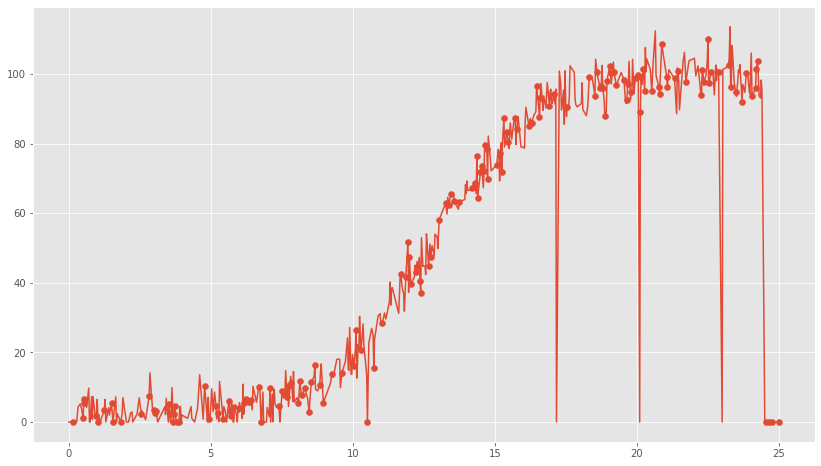

In [27]:
# Same polynomial.
f = lambda x: 2.0 * x**2 + 3.0 * x + 4.0

poly = pd.DataFrame()
poly['x'] = np.linspace(-10.0, 10.0, 1000)
poly['y'] = poly['x'].apply(f)

In [22]:
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[0.         4.75594973 0.01394276]]
Intercept:  [-13.00710465]


Text(0, 0.5, 'Power')

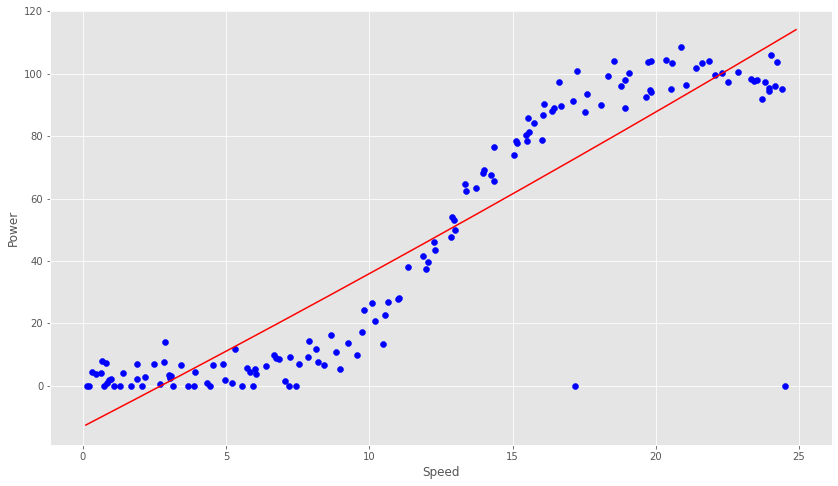

In [23]:
plt.scatter(train.speed, train.power,  color='blue')
XX = np.arange(0.1, 25.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("Speed")
plt.ylabel("Power")

In [24]:
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 14.73
Residual sum of squares (MSE): 555.65
R2-score: 0.58


Coefficients:  [[ 0.         -9.70263962  1.51193747 -0.04066344]]
Intercept:  [13.97918387]
Mean absolute error: 7.66
Residual sum of squares (MSE): 272.05
R2-score: 0.82


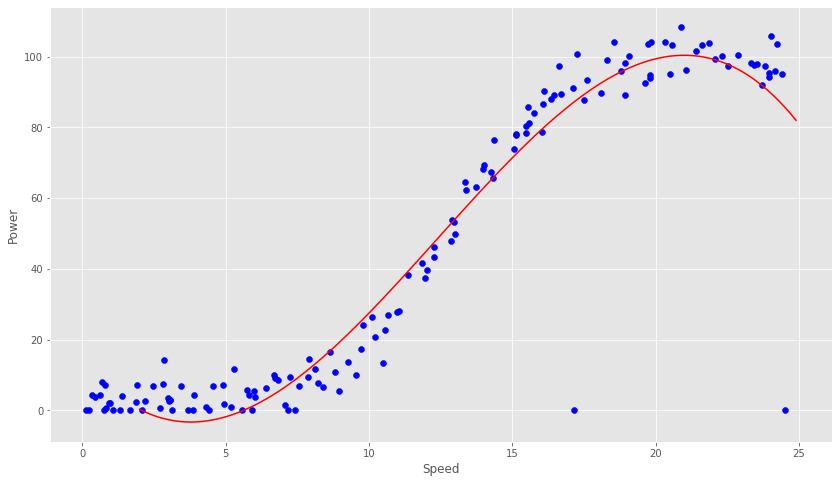

In [25]:
# write your code here
poly3 = PolynomialFeatures(degree=3)
train_x_poly3 = poly3.fit_transform(train_x)
clf3 = linear_model.LinearRegression()
train_y3_ = clf3.fit(train_x_poly3, train_y)
# The coefficients
print ('Coefficients: ', clf3.coef_)
print ('Intercept: ',clf3.intercept_)
plt.scatter(train.speed, train.power,  color='blue')
XX = np.arange(2, 25.0, 0.1)
yy = clf3.intercept_[0]+ clf3.coef_[0][1]*XX + clf3.coef_[0][2]*np.power(XX, 2) + clf3.coef_[0][3]*np.power(XX, 3)
plt.plot(XX, yy, '-r' )
plt.xlabel("Speed")
plt.ylabel("Power")
test_x_poly3 = poly3.fit_transform(test_x)
test_y3_ = clf3.predict(test_x_poly3)
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y3_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y3_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y3_ , test_y) )